In [1]:
#* Import and settings
import os
from os import path
import re

import numpy as np
from scipy.optimize import curve_fit
import sympy as sp
from sympy import Symbol as s
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from lab_tools import graph, lab_round

%matplotlib widget

width = 469.75502 # To get the page width insert "\the\textwidth" in your LaTeX document
graph_path = "../graphs/"
data_path = "../data/"

mpl.rcParams.update({
    # Show minor ticks
    "ytick.minor.visible": True,
    "xtick.minor.visible": True,
    # Use LaTeX to write all text
    "text.usetex": True,
    'text.latex.preamble' : [r'\usepackage{siunitx}', r'\usepackage{amsmath}'],
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 11,
    "font.size": 11,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    # High resolution .png
    "savefig.dpi": 600,
    # Default image size
    "figure.figsize": graph.size(width),
})

In [2]:
WAVE_LENGTH = 650 / 10**9

SLIT = 0.02 / 10**3 # 0.02 | 0.04 | 0.08
SLIT_POSITION = 4 / 10**2

SENSOR_SLIT = 1.5 / 10**3 # 0.5 | 1.0 | 1.5
SENSOR_POSITION = 102.5 / 10**2

distance = SENSOR_POSITION - SLIT_POSITION

In [3]:
sorted_data_path = path.join(data_path, "sorted")

def get_df_list(slit, sensor_slit):
    df_list = [
        pd.read_csv(
            path.join(sorted_data_path, file),
            sep=r"\s*,\s*",
            engine="python",
        ) for file in os.listdir(sorted_data_path)
        if re.search(f"{slit:.2f}_{sensor_slit:.1f}_[\\d]+_[\\w]", file)
    ]

    return df_list

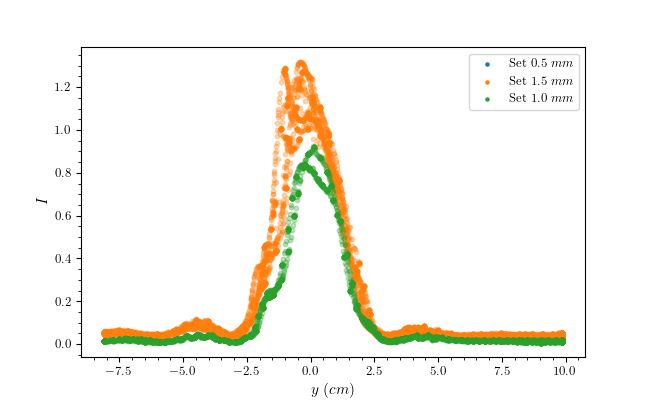

In [4]:
fig, ax = plt.subplots(1, 1)

sensor_slit_list = [0.5, 1.5, 1.0]
color_list = ['tab:blue', 'tab:orange', 'tab:green']
for sensor_slit, color in zip(sensor_slit_list, color_list):
    df_list = get_df_list(SLIT * 10**3, sensor_slit)

    ax.scatter([], [], s=5, color=color, label=f"Set ${sensor_slit:.1f} \; mm$")
    for df in df_list:
        ax.scatter(df.y * 10**2, df.I, s=10, color=color, alpha=0.3)

ax.set_ylabel(r"$I$")
ax.set_xlabel(r"$y \; (cm)$")
ax.legend()

fig.savefig(path.join(graph_path, f"scatter_{SLIT * 10**3:.2f}_all.png"))